### Visualization of Bandgap distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
polymers = pd.read_excel('Bandgap_chain4209.xlsx')
polymers.head()

,SMILES,bandgap_chain
0,[*]C[*],6.8063
1,[*]CC([*])C,6.4609
2,[*]CC([*])CC,6.6228
3,[*]CC([*])CCC,6.7380
4,[*]CC([*])CC(C)C,6.7268


In [3]:
# arrange all bandgap values in ascending order
sorted_data = polymers.sort_values(by=["bandgap_chain"], ascending=True, ignore_index=True)
print(f'Full dataset size: {sorted_data.shape}')

sorted_data.head()

Full dataset size: (4209, 2)


,SMILES,bandgap_chain
0,[*]C=C([*])c1ccc(NC=O)cc1,0.0710
1,[*]CCCCCC[N+]([*])(C)C,0.0738
2,[*]C=C([*])c1ccccc1,0.0933
3,[*]CCCCCC[N+](C)(C)CCCCC[N+]([*])(C)C,0.1118
4,[*]C=C1C=C([*])C[N+](CCCCCCCC)(CCCCS(=O)(=O)O)C1,0.1701


### Choosing number of bins for histogram

https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width

### Distribution of full dataset

#### Testing the plot

Mean: 4.4861 eV
Standard Deviation: 1.4458 eV
Max: 9.8351 eV
Min: 0.0710 eV


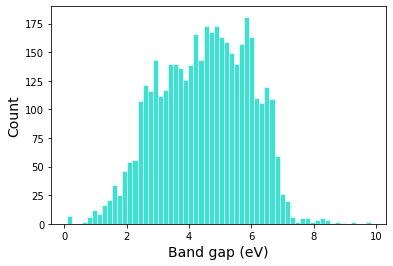

In [4]:
print(f"Mean: {np.mean(sorted_data['bandgap_chain'].to_numpy()):.4f} eV")
print(f"Standard Deviation: {np.std(sorted_data['bandgap_chain'].to_numpy()):.4f} eV")
print(f"Max: {max(sorted_data['bandgap_chain'].to_numpy()):.4f} eV")
print(f"Min: {min(sorted_data['bandgap_chain'].to_numpy()):.4f} eV")

plt.xlabel('Band gap (eV)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

x0 = sorted_data['bandgap_chain'].to_numpy()
kde = gaussian_kde(x0)

kwarg=dict(edgecolor="white", linewidth=0.5)

plt.hist(x0, color="turquoise", bins=60, **kwarg)

plt.show()

#### Plot with decorations

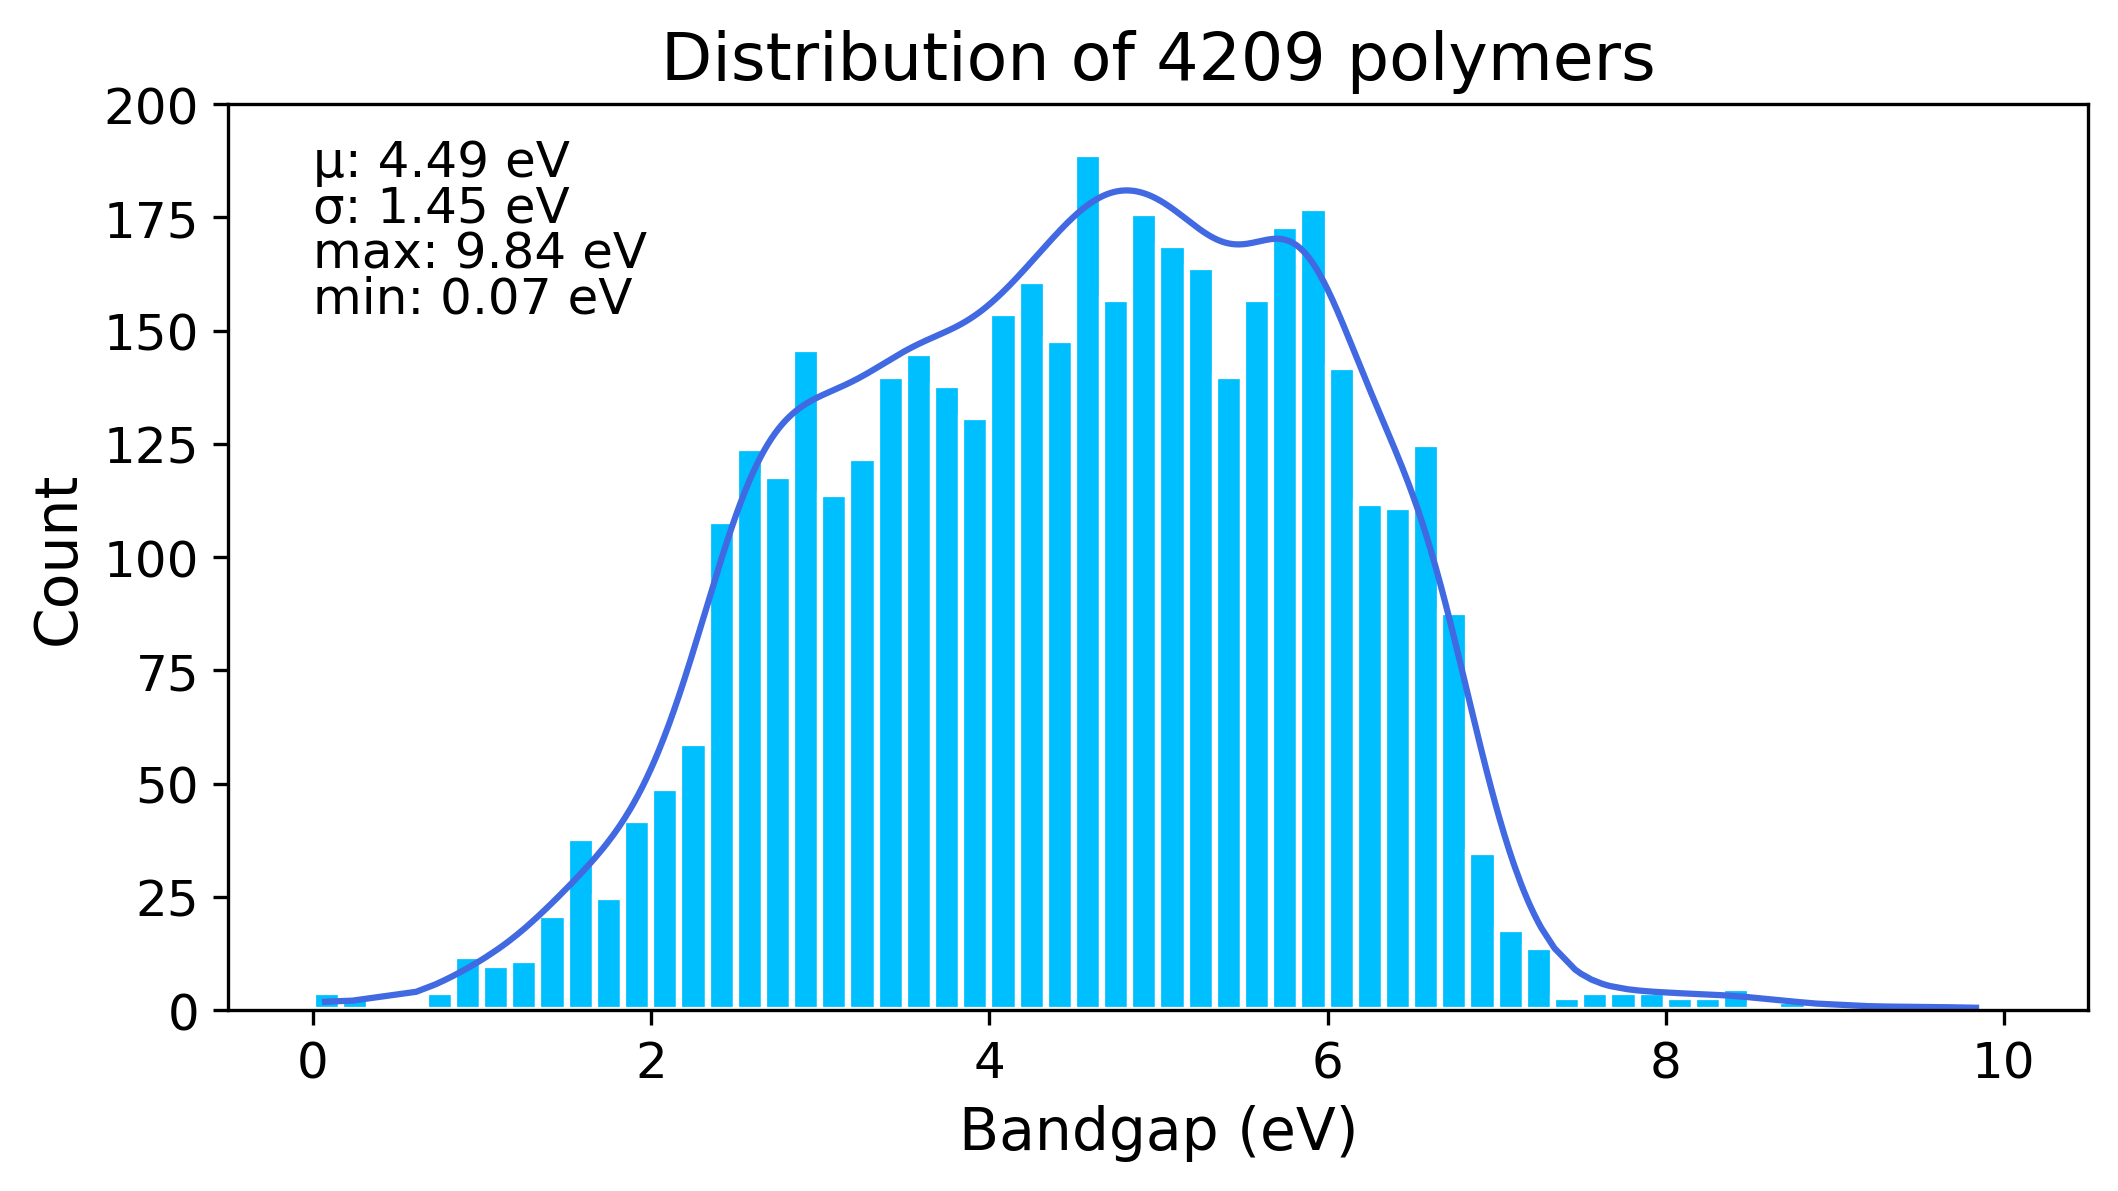

In [5]:
plt.figure(figsize=(8,4), dpi=300)

plt.title('Distribution of 4209 polymers', fontsize = 16)
plt.xlabel('Bandgap (eV)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

x0 = sorted_data['bandgap_chain'].to_numpy()
kde = gaussian_kde(x0)

kwarg=dict(edgecolor="white", linewidth=1.5)

plt.ylim([0,200])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.hist(x0, color="deepskyblue", bins=60, range=[0, 10], **kwarg)
plt.plot(x0, kde(x0)*750, color="royalblue", linewidth=1.5, linestyle='solid')

plt.text(0, 184, f"μ: {np.mean(sorted_data['bandgap_chain'].to_numpy()):.2f} eV", fontsize = 12)
plt.text(0, 174, f"σ: {np.std(sorted_data['bandgap_chain'].to_numpy()):.2f} eV", fontsize = 12)
plt.text(0, 164, f"max: {max(sorted_data['bandgap_chain'].to_numpy()):.2f} eV", fontsize = 12)
plt.text(0, 154, f"min: {min(sorted_data['bandgap_chain'].to_numpy()):.2f} eV", fontsize = 12)

plt.show()